### Participants:
- Carlos Paredes
- Stefano Sossi
- Vincent Valenzuela

In [1]:
import numpy as np
import pandas as pd
import os,math
import matplotlib.pyplot as plt
import seaborn as sns
import re
from dateutil.relativedelta import relativedelta 
from sklearn import svm
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [2]:
corpus_root = '../data/topten-coins/'

coins = list()
coins_names = list()
for coin_file in os.listdir(corpus_root):
   print(coin_file)
   coins_names.append(coin_file.split('.')[0])
   coins.append(pd.read_csv(os.path.join(corpus_root,coin_file)))

binance coin.csv
bitcoin.csv
cardano.csv
dogecoin.csv
ethereum.csv
polkadot.csv
solana.csv
tether.csv
usd coin.csv
xrp.csv


In [3]:

def order_top10coins(dfs):
    top_10 = list()
    index_list = list()
    leaderboard = pd.read_csv('../data/leaderboard/Current Crypto leaderboard.csv')
    leaderboard = leaderboard.head(10)
    for index,element in enumerate(coins_names, start=0):
        if leaderboard['Name'].str.contains(element,flags=re.IGNORECASE).any():
            i = leaderboard[leaderboard['Name'].apply(lambda x: x.upper() == element.upper())]
            top_10.append(dfs[index])
            index_list.append(int(i['Rank']))


    top_10 = [x for _, x in sorted(zip(index_list, top_10))]
    return top_10

top10_coins = order_top10coins(coins)
top10_coins[1]


,Date,Open,High,Low,Close,Volume,Currency,Name
0,2016-03-10,11.20,11.85,11.07,11.75,4,USD,ethereum
1,2016-03-11,11.75,11.95,11.75,11.95,179,USD,ethereum
2,2016-03-12,11.95,13.45,11.95,12.92,833,USD,ethereum
3,2016-03-13,12.92,15.07,12.92,15.07,1295,USD,ethereum
4,2016-03-14,15.07,15.07,11.40,12.50,92183,USD,ethereum
...,...,...,...,...,...,...,...,...
2087,2021-11-26,4520.30,4548.10,3917.43,4034.53,1004251,USD,ethereum
2088,2021-11-27,4037.06,4183.02,4029.06,4094.80,370731,USD,ethereum
2089,2021-11-28,4095.16,4297.63,3980.24,4296.98,487532,USD,ethereum
2090,2021-11-29,4296.98,4456.82,4280.18,4443.22,532658,USD,ethereum


# Bitcoin

**2021**

In [4]:
def filter_bydate(dfs, year):
    dfs_filtered = list()
    for index,element in enumerate(dfs, start=0):
        element['Date'] = pd.to_datetime(element['Date'])
        filtered_df = element.loc[element['Date'].dt.year == year]
        dfs_filtered.append(filtered_df)
    return dfs_filtered


top_10_2021 = filter_bydate(top10_coins, 2021)

def structure_data_for_model(dfs):
    for index,element in enumerate(dfs, start=0):
        element.drop(['Currency', 'Name'], axis=1, inplace=True)
        element.set_index('Date', inplace=True)
    return dfs



top_10_2021 = structure_data_for_model(top_10_2021)
top_10_2021[0]




C:\Users\Asus\anaconda3\envs\data_science\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Open,High,Low,Close,Volume
Date,,,,,
2021-01-01,28951.7,29627.1,28712.4,29359.9,100902
2021-01-02,29359.7,33233.5,29008.0,32193.3,240865
2021-01-03,32192.9,34755.9,32029.6,32958.9,155210
2021-01-04,33016.6,33587.5,28204.5,32022.6,255269
2021-01-05,32015.4,34414.7,30010.5,33991.5,202128
...,...,...,...,...,...
2021-11-26,58937.3,59151.1,53533.5,53730.9,104034
2021-11-27,53747.2,55280.3,53654.3,54765.9,40706
2021-11-28,54758.0,57392.3,53448.3,57291.5,49283


In [5]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

train, test = train_test_split(top_10_2021[0], test_size=0.2)
print(train)
print(test)

               Open     High      Low    Close  Volume
Date                                                  
2021-01-01  28951.7  29627.1  28712.4  29359.9  100902
2021-01-02  29359.7  33233.5  29008.0  32193.3  240865
2021-01-03  32192.9  34755.9  32029.6  32958.9  155210
2021-01-04  33016.6  33587.5  28204.5  32022.6  255269
2021-01-05  32015.4  34414.7  30010.5  33991.5  202128
...             ...      ...      ...      ...     ...
2021-09-21  43012.3  43619.3  39646.8  40651.3  142548
2021-09-22  40660.8  43976.7  40585.7  43551.6   93982
2021-09-23  43550.7  44949.8  43090.1  44869.2   74538
2021-09-24  44867.4  45112.0  40908.5  42819.9  128878
2021-09-25  42818.7  42959.3  41714.5  42686.8   46353

[268 rows x 5 columns]
               Open     High      Low    Close  Volume
Date                                                  
2021-09-26  42685.8  43907.3  40786.6  43203.4   69908
2021-09-27  43200.9  44293.2  42143.9  42172.6   54123
2021-09-28  42169.9  42758.8  40906.4  41

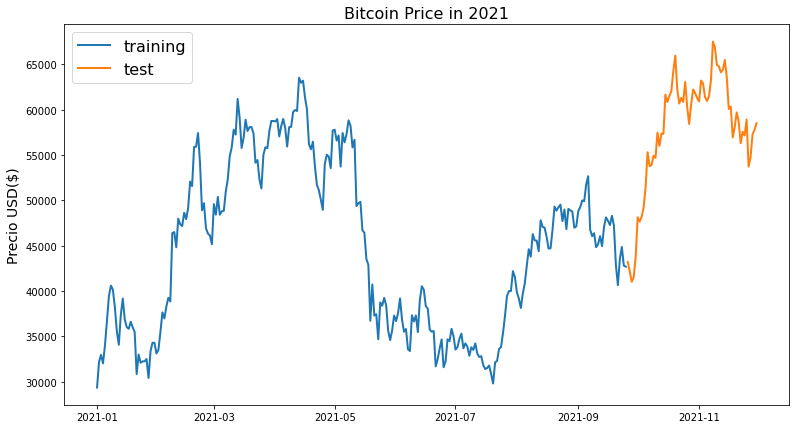

In [6]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('Precio USD($)', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)

line_plot(train['Close'], test['Close'], 'training', 'test', title='Bitcoin Price in 2021')

In [7]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (data.max() - df.min())

In [8]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [9]:
def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

train, test, X_train, X_test, y_train, y_test = prepare_data(
    top_10_2021[0], 'Close', window_len=5, zero_base=True, test_size=0.2)

In [10]:
def reshape_dataset(train_dataset):
    nsamples, nx, ny = train_dataset.shape
    d2_train_dataset = train_dataset.reshape((nsamples,nx*ny))
    return d2_train_dataset

X_train_2D = reshape_dataset(X_train)
X_test_2D = reshape_dataset(X_test)

In [11]:
def SVR_Model(X_train_2D,y_train, X_test_2D, y_test):
    clf = svm.SVR()
    clf.fit(X_train_2D, y_train)
    clf_preds = clf.predict(X_test_2D).squeeze()
    mean_err = mean_absolute_error(clf_preds, y_test)
    score = clf.score(X_test_2D, y_test)
    print("Score",score)
    print("MSE: "+ str(mean_err))
    return clf_preds

clf_preds = SVR_Model(X_train_2D,y_train, X_test_2D, y_test)

Score -0.07114305357300266
MSE: 0.056746042737609144


In [12]:
def getactualNpredictions(test,clf_preds):
    targets = test['Close'][5:]
    clf_preds = test['Close'].values[:-5] * (clf_preds + 1)
    clf_preds = pd.Series(index=targets.index, data=clf_preds)
    return targets, clf_preds

targets, clf_preds = getactualNpredictions(test, clf_preds)


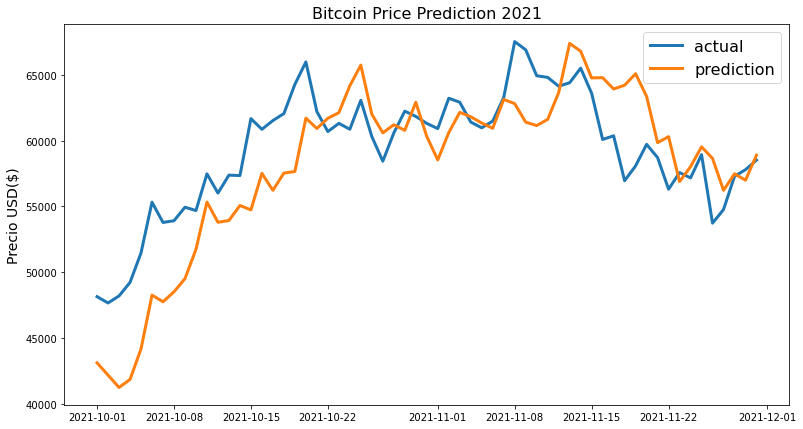

In [13]:
line_plot(targets, clf_preds, 'actual', 'prediction', lw=3,title='Bitcoin Price Prediction 2021')


**2018**

In [14]:
top_10_2018 = filter_bydate(top10_coins, 2018)
top_10_2018 = structure_data_for_model(top_10_2018)
bitcoin_2018 = top_10_2018[0]


C:\Users\Asus\anaconda3\envs\data_science\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
train_bitcoin_2018, test_bitcoin_2018 = train_test_split(bitcoin_2018, test_size=0.2)

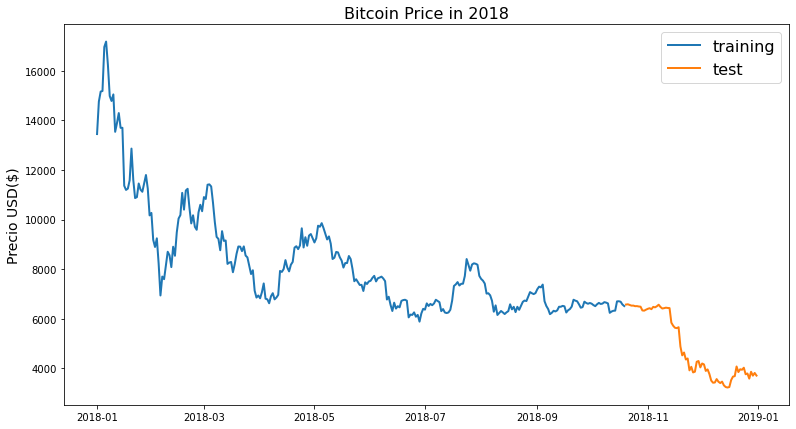

In [16]:
line_plot(train_bitcoin_2018['Close'], test_bitcoin_2018['Close'], 'training', 'test', title='Bitcoin Price in 2018')

In [17]:
train_bitcoin_2018, test_bitcoin_2018, X_train_bitcoin_2018, X_test_bitcoin_2018, y_train_bitcoin_2018, y_test_bitcoin_2018 = prepare_data(
    bitcoin_2018, 'Close', window_len=5, zero_base=True, test_size=0.2)

In [18]:
X_train_2D_bitcoin_2018 = reshape_dataset(X_train_bitcoin_2018)
X_test_2D_bitcoin_2018 = reshape_dataset(X_test_bitcoin_2018)

In [19]:
bitcoin_preds_2018 = SVR_Model(X_train_2D_bitcoin_2018,y_train_bitcoin_2018, X_test_2D_bitcoin_2018, y_test_bitcoin_2018)

Score 0.5305378598729207
MSE: 0.04334066729862571


In [20]:
targets, bitcoin_preds_2018 = getactualNpredictions(test_bitcoin_2018, bitcoin_preds_2018)

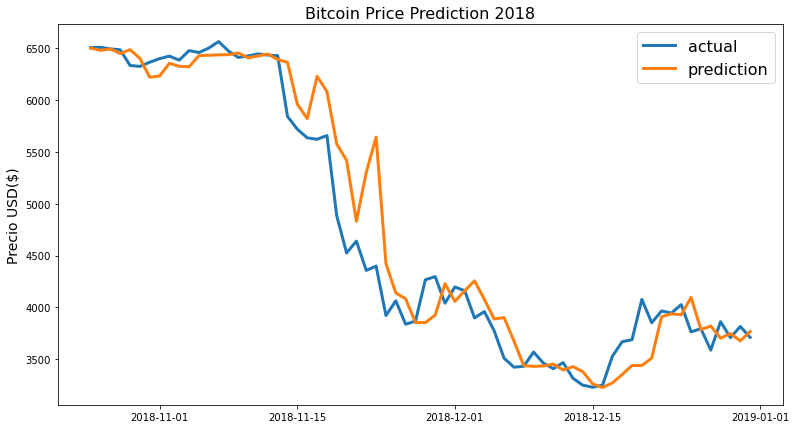

In [21]:
line_plot(targets, bitcoin_preds_2018, 'actual', 'prediction', lw=3,title='Bitcoin Price Prediction 2018')

# Ethereum

**2021**

In [22]:
train_ethereum, test_ethereum = train_test_split(top_10_2021[1], test_size=0.2)
print(train_ethereum)
print(test_ethereum)

               Open     High      Low    Close   Volume
Date                                                   
2021-01-01   735.87   748.96   715.74   729.12  1641656
2021-01-02   729.00   787.26   715.15   774.50  2253560
2021-01-03   774.54  1008.49   769.57   974.97  4022020
2021-01-04   977.76  1158.27   894.24  1042.40  5192008
2021-01-05  1042.48  1131.56   976.91  1099.52  3252048
...             ...      ...      ...      ...      ...
2021-09-21  2976.70  3101.88  2659.71  2761.52  1789381
2021-09-22  2764.71  3087.97  2740.58  3077.78  1187526
2021-09-23  3077.80  3173.00  3035.96  3152.92   841537
2021-09-24  3152.92  3158.38  2740.06  2928.57  1741144
2021-09-25  2928.59  2965.48  2812.70  2922.55   975494

[268 rows x 5 columns]
               Open     High      Low    Close   Volume
Date                                                   
2021-09-26  2922.47  3113.65  2740.12  3063.51  1326016
2021-09-27  3061.86  3163.86  2926.24  2926.24   865299
2021-09-28  2926.04  296

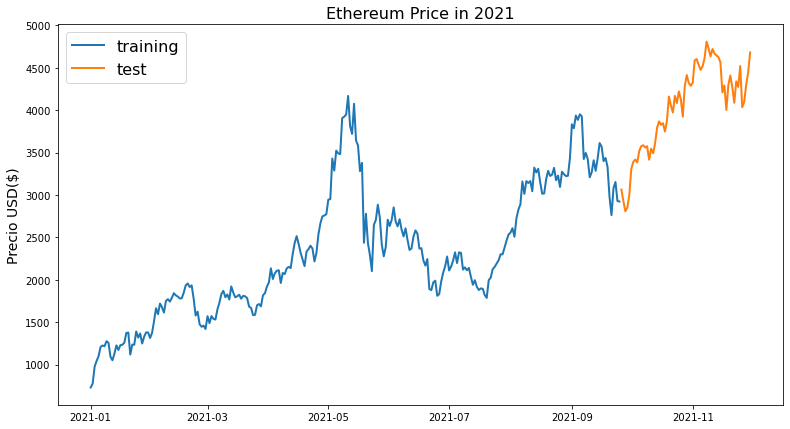

In [23]:
line_plot(train_ethereum['Close'], test_ethereum['Close'], 'training', 'test', title='Ethereum Price in 2021')

In [24]:
train_ethereum, test_ethereum, X_train_ethereum, X_test_ethereum, y_train_ethereum, y_test_ethereum = prepare_data(
    top_10_2021[1], 'Close', window_len=5, zero_base=True, test_size=0.2)

In [25]:
X_train_2D = reshape_dataset(X_train_ethereum)
X_test_2D = reshape_dataset(X_test_ethereum)

In [26]:

y_pred_ethereum = SVR_Model(X_train_2D,y_train_ethereum, X_test_2D, y_test_ethereum)


Score 0.5086442193221732
MSE: 0.03433174527139361


In [27]:
targets, y_pred_ethereum = getactualNpredictions(test_ethereum, y_pred_ethereum)

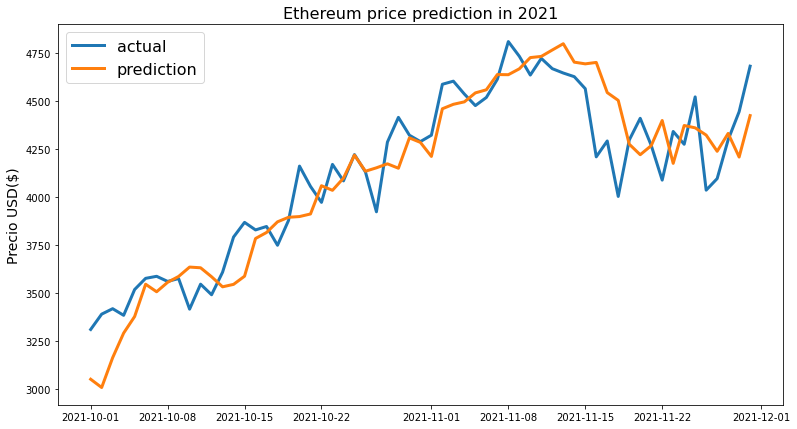

In [28]:
line_plot(targets, y_pred_ethereum, 'actual', 'prediction', lw=3,title='Ethereum price prediction in 2021')


**2018**

In [29]:
ethereum_2018 = top_10_2018[1]

In [30]:
train_ethereum_2018, test_ethereum_2018 = train_test_split(ethereum_2018, test_size=0.2)


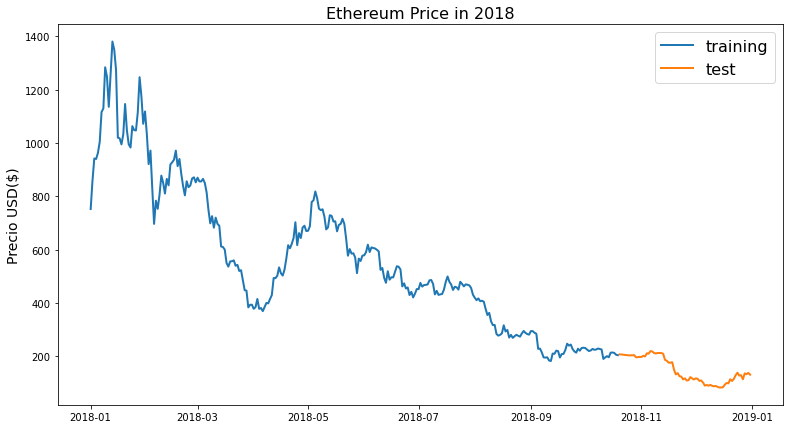

In [31]:
line_plot(train_ethereum_2018['Close'], test_ethereum_2018['Close'], 'training', 'test', title='Ethereum Price in 2018')


In [32]:
train_ethereum_2018, test_ethereum_2018, X_train_ethereum_2018, X_test_ethereum_2018, y_train_ethereum_2018, y_test_ethereum_2018 = prepare_data(
    ethereum_2018, 'Close', window_len=5, zero_base=True, test_size=0.2)

In [33]:
X_train_2D_ethereum_2018 = reshape_dataset(X_train_ethereum_2018)
X_test_2D_ethereum_2018 = reshape_dataset(X_test_ethereum_2018)

In [34]:
ethereum_preds_2018 = SVR_Model(X_train_2D_ethereum_2018,y_train_ethereum_2018, X_test_2D_ethereum_2018, y_test_ethereum_2018)

Score 0.6320406856658312
MSE: 0.06382177656040319


In [35]:
targets, ethereum_preds_2018 = getactualNpredictions(test_ethereum_2018, ethereum_preds_2018)


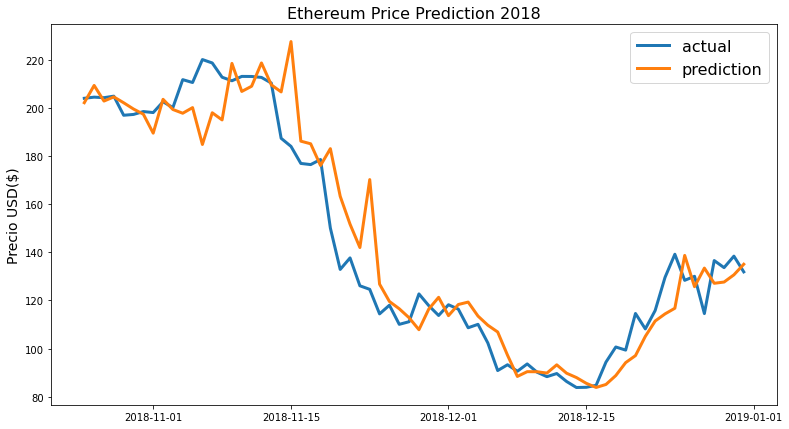

In [36]:
line_plot(targets, ethereum_preds_2018, 'actual', 'prediction', lw=3,title='Ethereum Price Prediction 2018')

# DogeCoin

**2021**

In [37]:
train_dogecoin, test_dogecoin= train_test_split(top_10_2021[9], test_size=0.2)
print(train_dogecoin)
print(test_dogecoin)


                Open      High       Low     Close        Volume
Date                                                            
2021-01-01  0.004666  0.005676  0.004606  0.005661    8405835264
2021-01-02  0.005667  0.014008  0.005553  0.010489  100850278400
2021-01-03  0.010493  0.013928  0.009381  0.009850   71680319488
2021-01-04  0.009845  0.011493  0.007623  0.009780   38716231680
2021-01-05  0.009784  0.010319  0.008866  0.009958   15365976064
...              ...       ...       ...       ...           ...
2021-09-21  0.208631  0.218054  0.197964  0.200575    2074527488
2021-09-22  0.200667  0.229903  0.200055  0.224454    2845200128
2021-09-23  0.224445  0.227079  0.217708  0.224668    1550563200
2021-09-24  0.224664  0.228217  0.197086  0.209142    2867265792
2021-09-25  0.209143  0.212464  0.204487  0.208383    1314738432

[268 rows x 5 columns]
                Open      High       Low     Close      Volume
Date                                                          
2021-

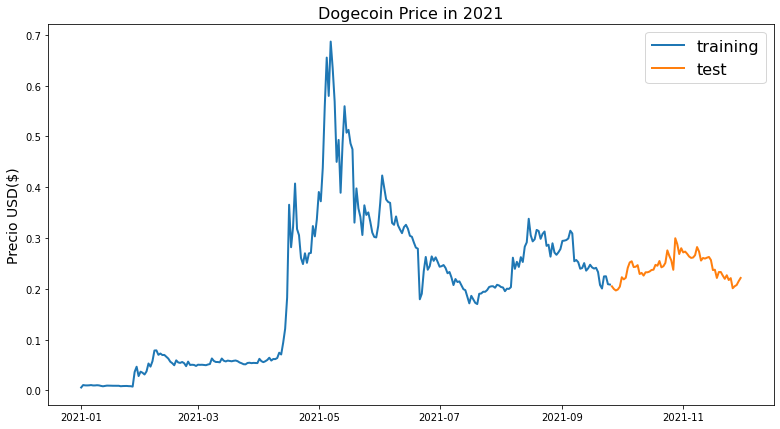

In [38]:
line_plot(train_dogecoin['Close'], test_dogecoin['Close'], 'training', 'test', title='Dogecoin Price in 2021')


In [39]:
train_dogecoin, test_dogecoin, X_train_dogecoin, X_test_dogecoin, y_train_dogecoin, y_test_dogecoin = prepare_data(
    top_10_2021[9], 'Close', window_len=5, zero_base=True, test_size=0.2)


In [40]:
X_train_2D = reshape_dataset(X_train_dogecoin)
X_test_2D = reshape_dataset(X_test_dogecoin)


In [41]:
y_predict_dogecoin = SVR_Model(X_train_2D,y_train_dogecoin, X_test_2D, y_test_dogecoin)

Score 0.4901407228170903
MSE: 0.04878461882697862


In [42]:
targets, y_predict_dogecoin = getactualNpredictions(test_dogecoin, y_predict_dogecoin)

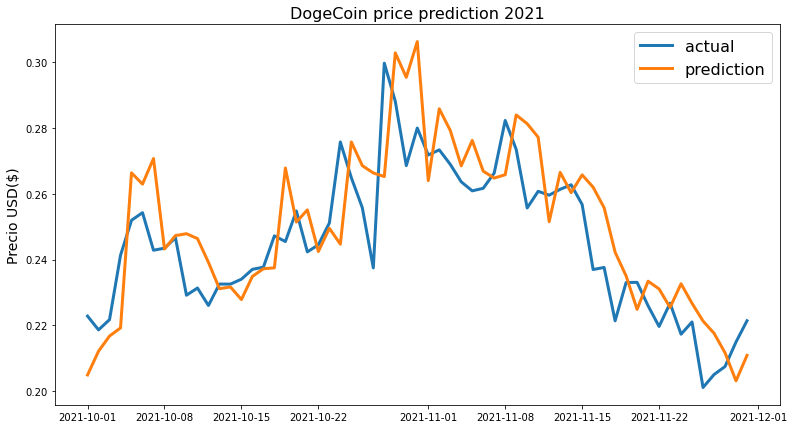

In [43]:
line_plot(targets, y_predict_dogecoin, 'actual', 'prediction', lw=3,title="DogeCoin price prediction 2021")


**2018**

In [44]:
dogecoin_2018 = top_10_2018[9]

In [45]:
train_dogecoin_2018, test_dogecoin_2018 = train_test_split(dogecoin_2018, test_size=0.2)

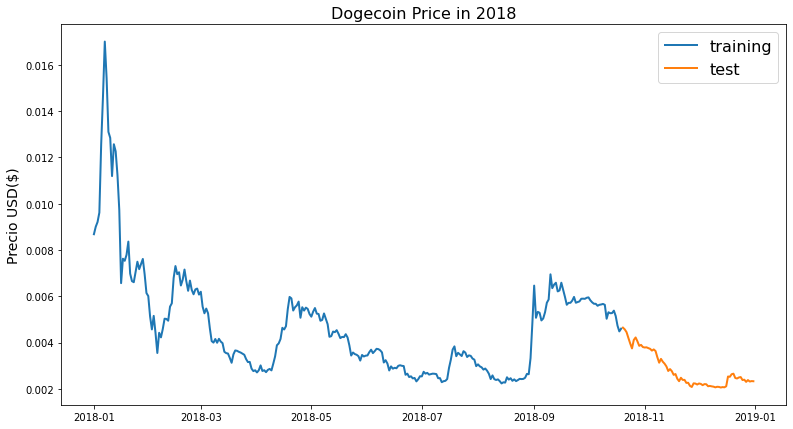

In [46]:
line_plot(train_dogecoin_2018['Close'], test_dogecoin_2018['Close'], 'training', 'test', title='Dogecoin Price in 2018')


In [47]:
train_dogecoin_2018, test_dogecoin_2018, X_train_dogecoin_2018, X_test_dogecoin_2018, y_train_dogecoin_2018, y_test_dogecoin_2018 = prepare_data(
    dogecoin_2018, 'Close', window_len=5, zero_base=True, test_size=0.2)

In [48]:

X_train_2D_dogecoin_2018 = reshape_dataset(X_train_dogecoin_2018)
X_test_2D_dogecoin_2018 = reshape_dataset(X_test_dogecoin_2018)

In [49]:
dogecoin_preds_2018 = SVR_Model(X_train_2D_dogecoin_2018,y_train_dogecoin_2018, X_test_2D_dogecoin_2018, y_test_dogecoin_2018)


Score 0.4483462164603389
MSE: 0.0475362899607351


In [50]:
targets, dogecoin_preds_2018 = getactualNpredictions(test_dogecoin_2018, dogecoin_preds_2018)


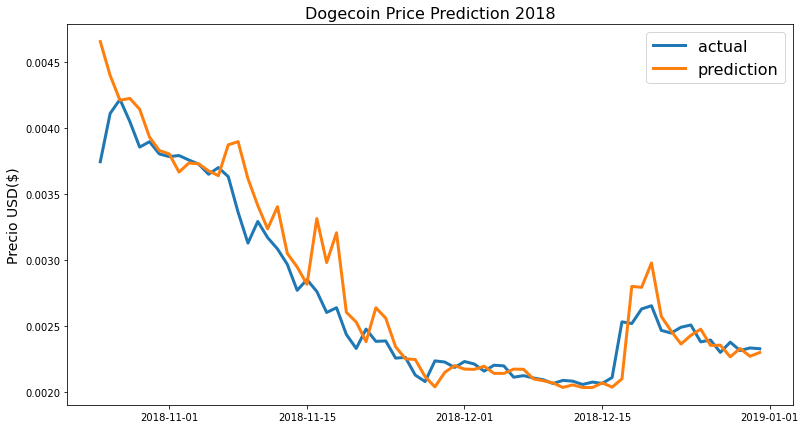

In [51]:
line_plot(targets, dogecoin_preds_2018, 'actual', 'prediction', lw=3,title='Dogecoin Price Prediction 2018')

# Correlation

In [52]:
def arrayisnot(array, list_of_arrays):
    for a in list_of_arrays:
        if np.array_equal(array, a):
            return False
    return True

In [53]:
correlation_coins = list()
correlation_coins_names = list()
for index1,element1 in enumerate(coins, start=0):
    for index2,element2 in enumerate(coins, start=0):
        if (not element1.equals(element2)):
            var = element1.corrwith(element2)
            if (var.Close >= 0.8):
                corr =  [element1,element2,var]
                cor = [element1.Name[0],element2.Name[0]]
                cor_inverse = [element2.Name[0],element1.Name[0]]
                if(arrayisnot(cor, correlation_coins_names)):
                    correlation_coins_names.append(cor_inverse)
                    correlation_coins.append(corr)

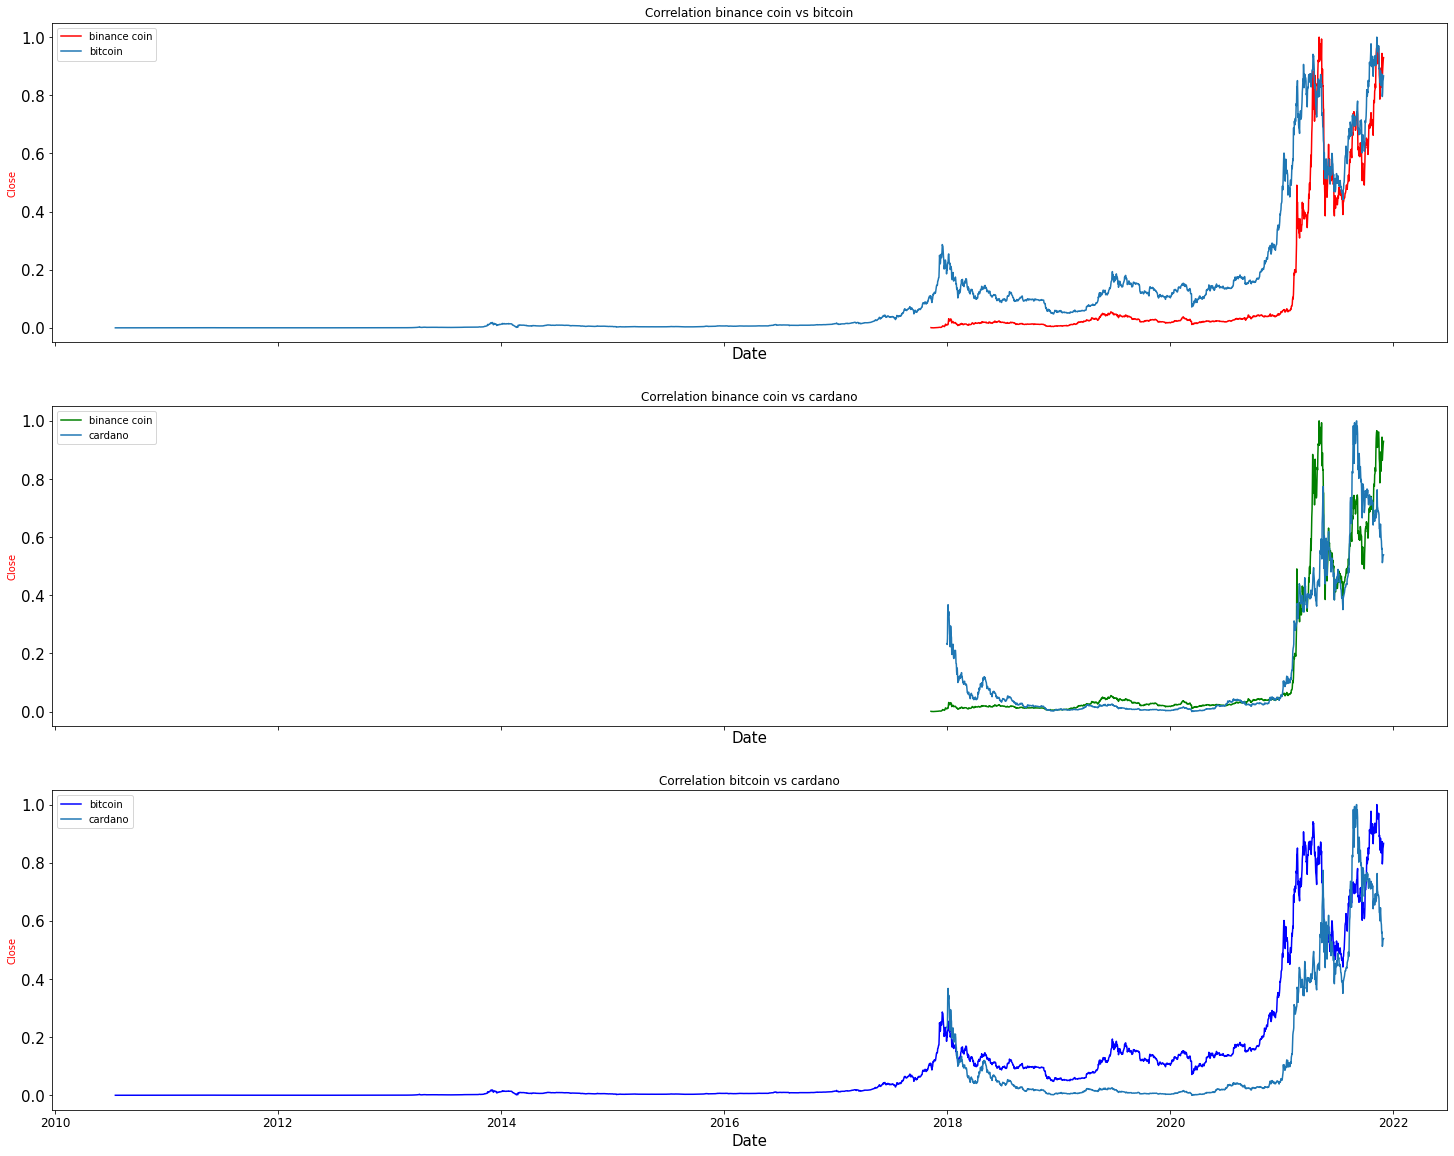

In [54]:
colors=['red','green','blue','yellow','black','cyan','magenta','brown','gray','rosybrown'
        ,'salmon','peachpuff','orange','gold','olive','lime','steelblue','pink','indigo']

ROWS =3
fig, axs = plt.subplots(ROWS,figsize=(25, 20), sharey=True, sharex=True)


for index,element in enumerate(correlation_coins, start=0):

    current_row = index%ROWS

    ax = axs[current_row]
    ax.plot(element[0]['Date'], (element[0]['Close'] - element[0]['Close'].min()) / (element[0]['Close'].max() - element[0]['Close'].min()),color=colors[index],label=element[0]['Name'][0])
    ax.plot(element[1]['Date'], (element[1]['Close'] - element[1]['Close'].min()) / (element[1]['Close'].max() - element[1]['Close'].min()),label=element[1]['Name'][0])
    ax.set_title("Correlation " + str(element[0]['Name'][0]) + ' vs ' + str(element[1]['Name'][0]))
    ax.set_ylabel('Close',color='red')
    ax.set_xlabel('Date', size=15)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=15)
    ax.legend()

**For Analyze data points we used a rolling average of the prices based on the previous 7 day's**

In [55]:
# Created a Dataframe for saving the averages of the close price baased on the previous 7 days. 
crypto = pd.DataFrame()
crypto['Bitcoin']=top_10_2021[0].Close.rolling(7).mean()
crypto['Ethereum']=top_10_2021[1].Close.rolling(7).mean()
crypto['Binancecoin']=top_10_2021[2].Close.rolling(7).mean()
crypto['Tether']=top_10_2021[3].Close.rolling(7).mean()
crypto['Solana']=top_10_2021[4].Close.rolling(7).mean()
crypto['Cardano']=top_10_2021[5].Close.rolling(7).mean()
crypto['XRP']=top_10_2021[6].Close.rolling(7).mean()
crypto['USDcoin']=top_10_2021[7].Close.rolling(7).mean()
crypto['Polkadot']=top_10_2021[8].Close.rolling(7).mean()
crypto['Dogecoin']=top_10_2021[9].Close.rolling(7).mean()

crypto.corr()

,Bitcoin,Ethereum,Binancecoin,Tether,Solana,Cardano,XRP,USDcoin,Polkadot,Dogecoin
Bitcoin,1.000000,0.557611,0.628715,-0.285253,0.093064,0.375694,0.518230,0.061373,0.931692,0.097908
Ethereum,0.557611,1.000000,0.853816,-0.143449,0.880744,0.818771,0.771902,0.072401,0.624038,0.667070
Binancecoin,0.628715,0.853816,1.000000,-0.159509,0.801315,0.729968,0.914687,0.103957,0.685441,0.753231
Tether,-0.285253,-0.143449,-0.159509,1.000000,-0.075043,-0.248432,-0.049693,-0.742823,-0.180009,0.100058
Solana,0.093064,0.880744,0.801315,-0.075043,1.000000,0.914664,0.769818,0.122895,0.146069,0.812074
Cardano,0.375694,0.818771,0.729968,-0.248432,0.914664,1.000000,0.717998,0.241373,0.458842,0.623281
XRP,0.518230,0.771902,0.914687,-0.049693,0.769818,0.717998,1.000000,-0.040327,0.585365,0.802719
USDcoin,0.061373,0.072401,0.103957,-0.742823,0.122895,0.241373,-0.040327,1.000000,0.052944,-0.085868
Polkadot,0.931692,0.624038,0.685441,-0.180009,0.146069,0.458842,0.585365,0.052944,1.000000,0.222756
Dogecoin,0.097908,0.667070,0.753231,0.100058,0.812074,0.623281,0.802719,-0.085868,0.222756,1.000000


Text(0.5, 1.0, 'Correlation heatmap of crypto coins')

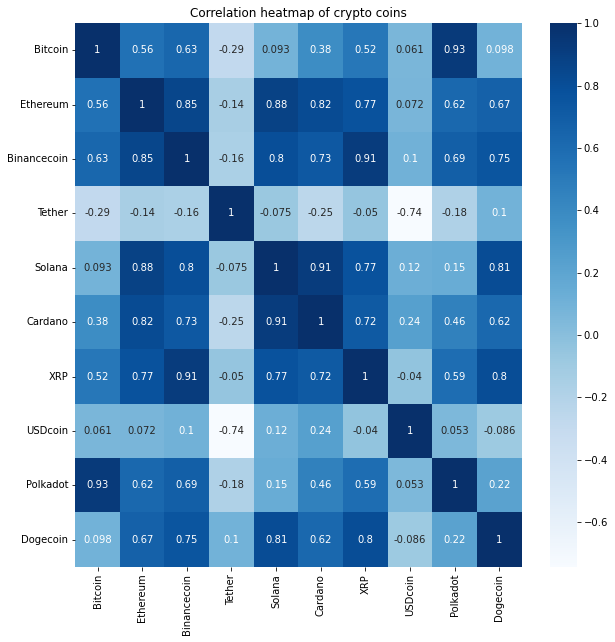

In [56]:
# Plot a heat map with the prices of all the cryptocurrencies
plt.figure(figsize = (10,10))
sns.heatmap(crypto.corr(),annot=True, cmap='Blues').set_title('Correlation heatmap of crypto coins')

Now that we have a better visualization for the correlation. We can see that the in most of the cases the data have a high correlation with each other. Looking at the first row in **BitCoin** we see that the lowest correlation with Tether is `-0.29`, which is a good value. **Polkadot** has the highest correlation with **BitCoin** at `0.93` which means that is extremely a high value, we can say that almost is the same value.


And looking for the lowest correlation we have ***USD Coin** with **Tether** at `-0.74`.

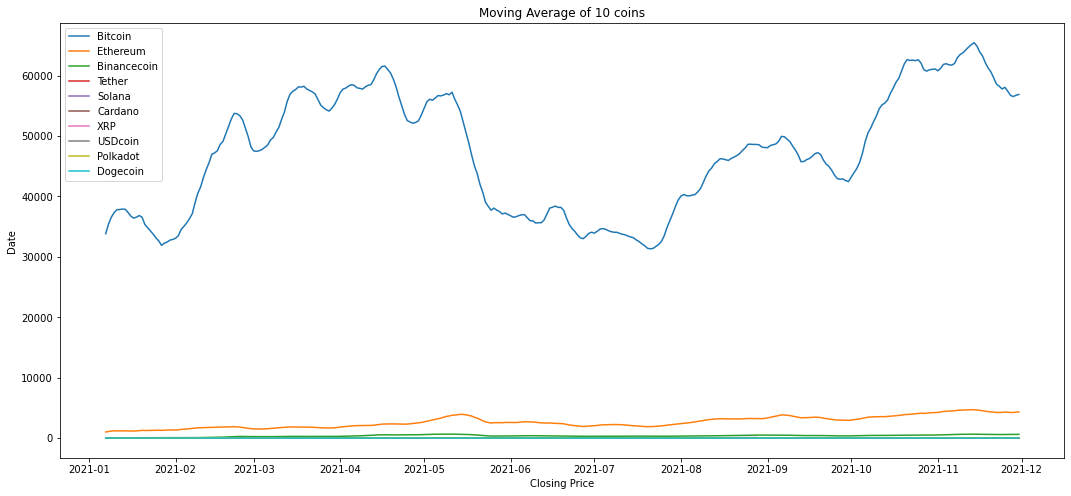

In [57]:
# Create a plot with the averages
plt.figure(figsize=(18,8))
plt.xlabel('Closing Price')
plt.ylabel('Date')
plt.title("Moving Average of 10 coins")
plt.plot(crypto)
plt.legend(crypto.columns,loc='upper left')
